# CHILDES Age vs IPSyn Score

In [1]:
import os
import csv
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [2]:
# List of CSV files to process
ipsyn_files_50 = ['Adam_ipsyn50.csv', 'Eve_ipsyn50.csv', 'Sarah_ipsyn50.csv']  # Uses _ipsyn50.csv files
ipsyn_files_100 = ['Adam_ipsyn100.csv', 'Eve_ipsyn100.csv', 'Sarah_ipsyn100.csv']  # Uses _ipsyn100.csv files

# Initialize a 2D array to store Spearman's rho values for each CSV file
spearman_rhos_50 = []
spearman_rhos_100 = []

# Load the original _mlu.csv files to get ages (they are the only files that have the corresponding ages for each transcript)
age_files = ['Adam_mlu.csv', 'Eve_mlu.csv', 'Sarah_mlu.csv']

In [3]:
def age_in_months(age_str):
    parts = age_str.split(';')
    if len(parts) == 2:  # Example Format: "2;11.28"
        years = int(parts[0])
        months_and_days = parts[1].split('.')
        months = float(months_and_days[0]) + float(months_and_days[1]) / 30  # Keep decimal for days
        return years * 12 + months
    return 0  # Consider raising an error instead of returning 0 for invalid formats

In [4]:
def age_ipsyn_plots(ipsyn_files, spearman_rhos, age_files):
    age_data = {}

    for age_file in age_files:
        if os.path.exists(age_file):
            with open(age_file, 'r', encoding='utf-8') as file:
                reader = csv.DictReader(file)
                data = list(reader)
                # Store ages in a dictionary with the base filename as the key
                for entry in data:
                    base_filename = entry['File'].split('.')[0]  # Get the base filename
                    age_data[base_filename] = age_in_months(entry['Age'])  # Store the age

    for ipsyn_file in ipsyn_files:
        # Check if the file exists before attempting to open it
        if os.path.exists(ipsyn_file):
            with open(ipsyn_file, 'r', encoding='utf-8') as file:
                reader = csv.DictReader(file)
                data = list(reader)

            # Initialize list to hold chosen transcripts and their IPSyn scores
            chosen_transcripts = []
            transcript_list = []
            time_steps = []  # New list to hold time steps

            # Select the first transcript
            if data:  # Check if there is any data
                first_data = data[0]
                # Extract the base filename to get the corresponding age
                base_filename = first_data['File'].split('.')[0]
                first_age = age_data.get(base_filename, 0)  # Get the corresponding age or default to 0
                chosen_transcripts.append((first_age, float(first_data['IPSyn Score'])))
                transcript_list.append(first_data['File'])  # Collect the first transcript name

                last_chosen_age = first_age

                # Select subsequent transcripts that are at least 1 month apart
                for entry in data[1:]:  # Start from the second transcript
                    base_filename = entry['File'].split('.')[0]
                    current_age = age_data.get(base_filename, 0)  # Get the corresponding age or default to 0
                    if current_age - last_chosen_age >= 1:
                        chosen_transcripts.append((current_age, float(entry['IPSyn Score'])))  # Collect age and IPSyn score
                        transcript_list.append(entry['File'])  # Collect the transcript name
                        time_steps.append(current_age - last_chosen_age)  # Calculate time step without rounding
                        last_chosen_age = current_age

            # Plot Age vs IPSyn Score
            ages = [t[0] for t in chosen_transcripts]
            ipsyn_scores = [t[1] for t in chosen_transcripts]

            plt.figure(figsize=(10, 5))
            plt.scatter(ages, ipsyn_scores, marker='o')  # scatter plot
            plt.title(f'Age vs IPSyn Score for {ipsyn_file}')
            plt.xlabel('Age (months)')
            plt.ylabel('IPSyn Score')
            plt.grid()
            plt.show()       

            # Calculate Spearman's rho
            if len(ages) > 1:  # Ensure there are enough data points
                spearman_corr, _ = spearmanr(ages, ipsyn_scores)
                spearman_rhos.append([ipsyn_file, spearman_corr])  # Store the file name and Spearman's rho value
                print(f"Spearman's rho for {ipsyn_file}: {spearman_corr:.4f}\n")

            # Print the list of chosen transcripts, converted ages, and time steps
            print(f"Chosen Transcripts for {ipsyn_file}: \n", transcript_list, "\n")
            print(f"IPSyn Scores for {ipsyn_file}: \n", ipsyn_scores, "\n")  # Print the IPSyn scores
            print(f"Ages for {ipsyn_file}: \n", ages, "\n")  # Print the converted ages
            print(f"Time Steps for {ipsyn_file}: \n", time_steps, "\n")  # Print the time steps

## Age vs IPSyn Score (50 Utterances)

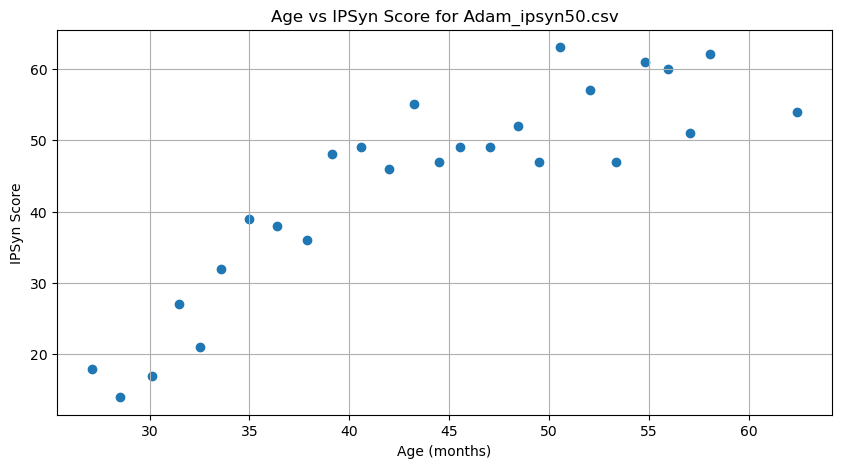

Spearman's rho for Adam_ipsyn50.csv: 0.8699

Chosen Transcripts for Adam_ipsyn50.csv: 
 ['020304.cha', '020415.cha', '020603.cha', '020714.cha', '020816.cha', '020918.cha', '021030.cha', '030011.cha', '030126.cha', '030304.cha', '030418.cha', '030529.cha', '030707.cha', '030814.cha', '030916.cha', '031101.cha', '040014.cha', '040115.cha', '040217.cha', '040401.cha', '040511.cha', '040624.cha', '040729.cha', '040902.cha', '041002.cha', '050212.cha'] 

IPSyn Scores for Adam_ipsyn50.csv: 
 [18.0, 14.0, 17.0, 27.0, 21.0, 32.0, 39.0, 38.0, 36.0, 48.0, 49.0, 46.0, 55.0, 47.0, 49.0, 49.0, 52.0, 47.0, 63.0, 57.0, 47.0, 61.0, 60.0, 51.0, 62.0, 54.0] 

Ages for Adam_ipsyn50.csv: 
 [27.133333333333333, 28.5, 30.1, 31.46666666666667, 32.53333333333333, 33.6, 35.0, 36.36666666666667, 37.86666666666667, 39.13333333333333, 40.6, 41.96666666666667, 43.233333333333334, 44.46666666666667, 45.53333333333333, 47.03333333333333, 48.46666666666667, 49.5, 50.56666666666666, 52.03333333333333, 53.366666666666

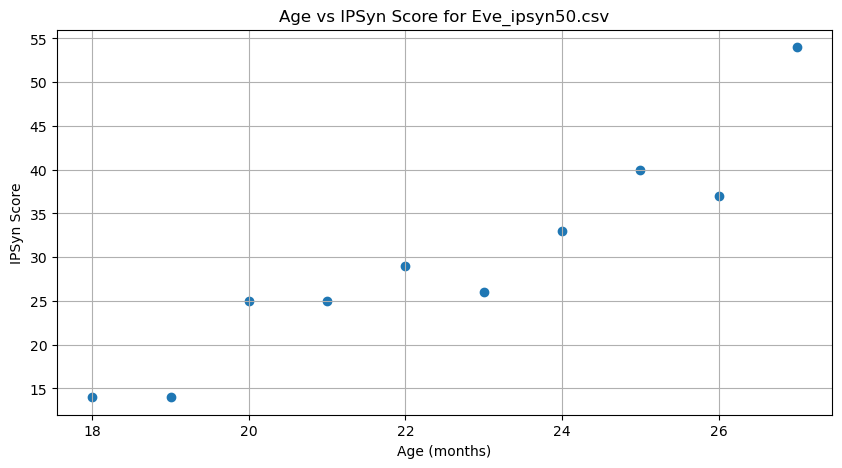

Spearman's rho for Eve_ipsyn50.csv: 0.9695

Chosen Transcripts for Eve_ipsyn50.csv: 
 ['010600a.cha', '010700a.cha', '010800.cha', '010900a.cha', '011000a.cha', '011100a.cha', '020000a.cha', '020100a.cha', '020200a.cha', '020300a.cha'] 

IPSyn Scores for Eve_ipsyn50.csv: 
 [14.0, 14.0, 25.0, 25.0, 29.0, 26.0, 33.0, 40.0, 37.0, 54.0] 

Ages for Eve_ipsyn50.csv: 
 [18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0] 

Time Steps for Eve_ipsyn50.csv: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 



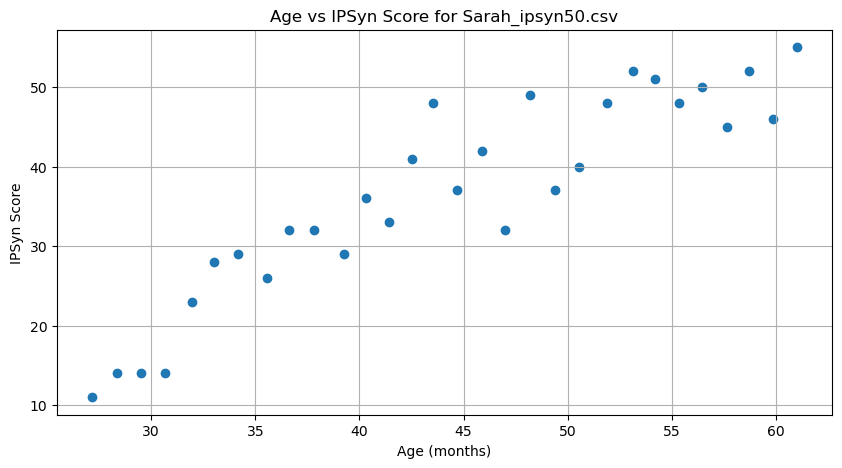

Spearman's rho for Sarah_ipsyn50.csv: 0.9137

Chosen Transcripts for Sarah_ipsyn50.csv: 
 ['020305.cha', '020410.cha', '020515.cha', '020620.cha', '020728.cha', '020900.cha', '021005.cha', '021117.cha', '030018a.cha', '030124.cha', '030307a.cha', '030409.cha', '030513.cha', '030616.cha', '030716.cha', '030820.cha', '030926a.cha', '031030.cha', '040005.cha', '040111.cha', '040216.cha', '040326.cha', '040504.cha', '040605.cha', '040711.cha', '040813.cha', '040919.cha', '041021.cha', '041126.cha', '050030.cha'] 

IPSyn Scores for Sarah_ipsyn50.csv: 
 [11.0, 14.0, 14.0, 14.0, 23.0, 28.0, 29.0, 26.0, 32.0, 32.0, 29.0, 36.0, 33.0, 41.0, 48.0, 37.0, 42.0, 32.0, 49.0, 37.0, 40.0, 48.0, 52.0, 51.0, 48.0, 50.0, 45.0, 52.0, 46.0, 55.0] 

Ages for Sarah_ipsyn50.csv: 
 [27.166666666666668, 28.333333333333332, 29.5, 30.666666666666668, 31.933333333333334, 33.0, 34.166666666666664, 35.56666666666666, 36.6, 37.8, 39.233333333333334, 40.3, 41.43333333333334, 42.53333333333333, 43.53333333333333, 44.666

In [5]:
age_ipsyn_plots(ipsyn_files_50, spearman_rhos_50, age_files)

## Age vs IPSyn Score (100 Utterances)

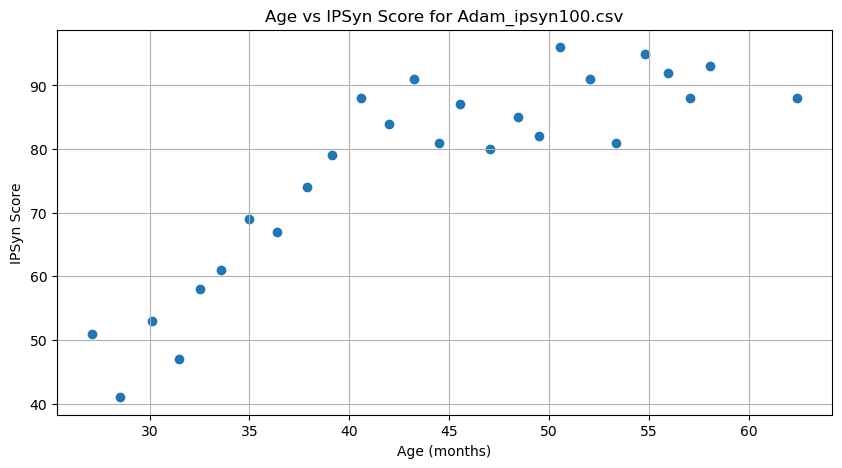

Spearman's rho for Adam_ipsyn100.csv: 0.8587

Chosen Transcripts for Adam_ipsyn100.csv: 
 ['020304.cha', '020415.cha', '020603.cha', '020714.cha', '020816.cha', '020918.cha', '021030.cha', '030011.cha', '030126.cha', '030304.cha', '030418.cha', '030529.cha', '030707.cha', '030814.cha', '030916.cha', '031101.cha', '040014.cha', '040115.cha', '040217.cha', '040401.cha', '040511.cha', '040624.cha', '040729.cha', '040902.cha', '041002.cha', '050212.cha'] 

IPSyn Scores for Adam_ipsyn100.csv: 
 [51.0, 41.0, 53.0, 47.0, 58.0, 61.0, 69.0, 67.0, 74.0, 79.0, 88.0, 84.0, 91.0, 81.0, 87.0, 80.0, 85.0, 82.0, 96.0, 91.0, 81.0, 95.0, 92.0, 88.0, 93.0, 88.0] 

Ages for Adam_ipsyn100.csv: 
 [27.133333333333333, 28.5, 30.1, 31.46666666666667, 32.53333333333333, 33.6, 35.0, 36.36666666666667, 37.86666666666667, 39.13333333333333, 40.6, 41.96666666666667, 43.233333333333334, 44.46666666666667, 45.53333333333333, 47.03333333333333, 48.46666666666667, 49.5, 50.56666666666666, 52.03333333333333, 53.36666666

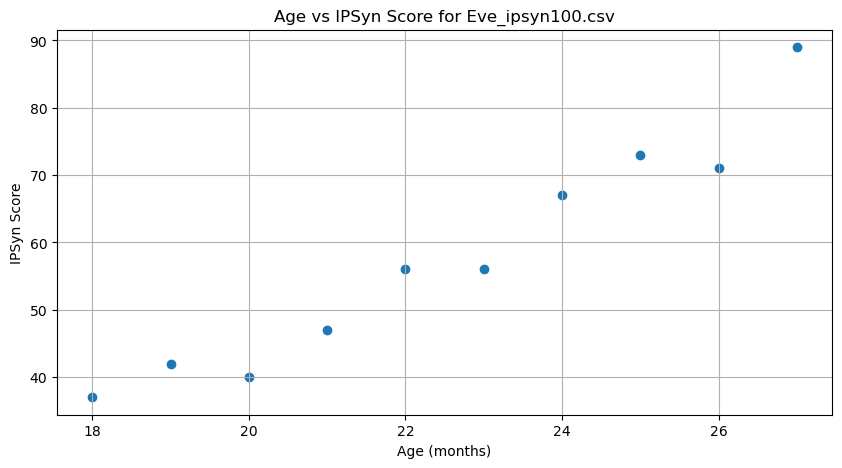

Spearman's rho for Eve_ipsyn100.csv: 0.9726

Chosen Transcripts for Eve_ipsyn100.csv: 
 ['010600a.cha', '010700a.cha', '010800.cha', '010900a.cha', '011000a.cha', '011100a.cha', '020000a.cha', '020100a.cha', '020200a.cha', '020300a.cha'] 

IPSyn Scores for Eve_ipsyn100.csv: 
 [37.0, 42.0, 40.0, 47.0, 56.0, 56.0, 67.0, 73.0, 71.0, 89.0] 

Ages for Eve_ipsyn100.csv: 
 [18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0] 

Time Steps for Eve_ipsyn100.csv: 
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 



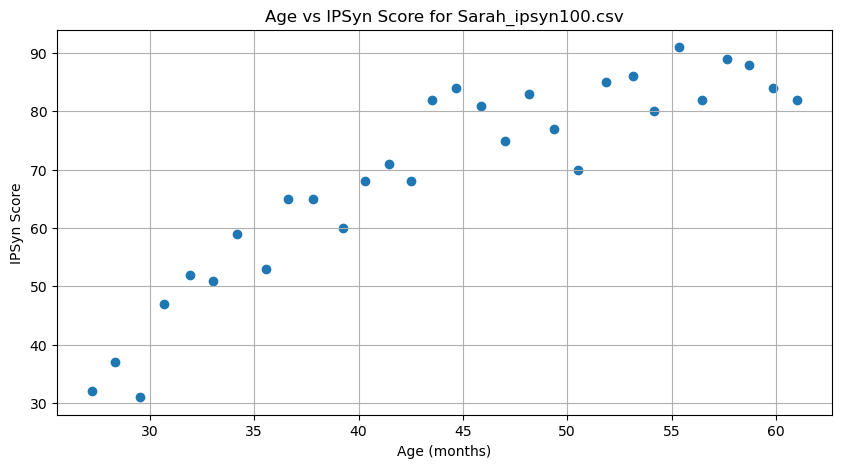

Spearman's rho for Sarah_ipsyn100.csv: 0.9028

Chosen Transcripts for Sarah_ipsyn100.csv: 
 ['020307.cha', '020410.cha', '020515.cha', '020620.cha', '020728.cha', '020900.cha', '021005.cha', '021117.cha', '030018a.cha', '030124.cha', '030307a.cha', '030409.cha', '030513.cha', '030616.cha', '030716.cha', '030820.cha', '030926a.cha', '031030.cha', '040005.cha', '040111.cha', '040216.cha', '040326.cha', '040504.cha', '040605.cha', '040711.cha', '040813.cha', '040919.cha', '041021.cha', '041126.cha', '050030.cha'] 

IPSyn Scores for Sarah_ipsyn100.csv: 
 [32.0, 37.0, 31.0, 47.0, 52.0, 51.0, 59.0, 53.0, 65.0, 65.0, 60.0, 68.0, 71.0, 68.0, 82.0, 84.0, 81.0, 75.0, 83.0, 77.0, 70.0, 85.0, 86.0, 80.0, 91.0, 82.0, 89.0, 88.0, 84.0, 82.0] 

Ages for Sarah_ipsyn100.csv: 
 [27.233333333333334, 28.333333333333332, 29.5, 30.666666666666668, 31.933333333333334, 33.0, 34.166666666666664, 35.56666666666666, 36.6, 37.8, 39.233333333333334, 40.3, 41.43333333333334, 42.53333333333333, 43.53333333333333, 44

In [6]:
age_ipsyn_plots(ipsyn_files_100, spearman_rhos_100, age_files)

## Spearman's ρ

In [7]:
spearman_rhos_50

[['Adam_ipsyn50.csv', 0.8699083815459872],
 ['Eve_ipsyn50.csv', 0.9695302189773755],
 ['Sarah_ipsyn50.csv', 0.9136503011085346]]

In [8]:
spearman_rhos_100

[['Adam_ipsyn100.csv', 0.8586589056708851],
 ['Eve_ipsyn100.csv', 0.9726488698881034],
 ['Sarah_ipsyn100.csv', 0.9028167051451762]]